# Analysis

## Set-up data for the experiments

In [2]:
import os
import pandas as pd


datamatrixDf = pd.read_csv(os.environ['MIMIC_EHR_PIPELINE_BASE'] + '''/data/sepsis_icd_cohort/final/data_matrix.csv''')
datamatrixDf

,person_id,visit_occurrence_id,measurement_date,visit_start_datetime_adm,death_datetime_adm,death_0_7_adm,death_0_14_adm,death_0_21_adm,death_0_30_adm,death_0_60_adm,...,labs_Prothrombin time (PT)_last,labs_INR in Platelet poor plasma by Coagulation assay_last,labs_aPTT in Blood by Coagulation assay_last,labs_Specific gravity of Urine by Test strip_last,labs_pH of Urine by Test strip_last,labs_Bilirubin.total in Serum or Plasma_last,labs_Aspartate aminotransferase in Serum or Plasma_last,labs_Alanine aminotransferase in Serum or Plasma_last,labs_Alkaline phosphatase in Serum or Plasma_last,labs_Albumin in Serum or Plasma_last
0,-1197427589,-2146275445,2123-04-12,2123-04-11 12:39:00,2128-05-15 00:00:00,0,0,0,0,0,...,25.000000,2.400000,55.3,1.023815,5.885000,0.800000,85.000000,52.0000,159.000000,2.605000
1,-1197427589,-2146275445,2123-04-13,2123-04-11 12:39:00,2128-05-15 00:00:00,0,0,0,0,0,...,22.700000,2.150000,60.9,1.019660,6.100000,0.500000,58.000000,61.0000,219.000000,2.542500
2,-1197427589,-2146275445,2123-04-14,2123-04-11 12:39:00,2128-05-15 00:00:00,0,0,0,0,0,...,20.900000,1.900000,62.3,1.014580,5.950000,0.500000,31.000000,38.0000,238.000000,2.389000
3,-1197427589,-2146275445,2123-04-15,2123-04-11 12:39:00,2128-05-15 00:00:00,0,0,0,0,0,...,22.800000,2.200000,62.8,1.015280,5.622500,0.300000,28.000000,30.0000,254.000000,2.303333
4,-1197427589,-2146275445,2123-04-16,2123-04-11 12:39:00,2128-05-15 00:00:00,0,0,0,0,0,...,25.000000,2.400000,62.8,1.010677,5.464167,1.777500,64.603333,62.1225,290.913333,2.324500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10484,-846098588,2138042415,2149-12-18,2149-12-01 06:39:00,2152-01-12 19:22:00,0,0,0,0,0,...,13.200000,1.100000,25.5,1.013060,6.620000,1.593500,42.020000,49.2150,370.938333,2.525000
10485,-846098588,2138042415,2149-12-19,2149-12-01 06:39:00,2152-01-12 19:22:00,0,0,0,0,0,...,13.100000,1.100000,30.1,1.016555,6.667500,0.600000,43.000000,37.0000,392.000000,2.724000
10486,-846098588,2138042415,2149-12-20,2149-12-01 06:39:00,2152-01-12 19:22:00,0,0,0,0,0,...,12.900000,1.100000,35.6,1.013160,6.742500,0.600000,42.000000,38.0000,369.000000,2.900000
10487,1039874845,2143115001,2136-09-29,2136-09-28 18:22:00,2136-10-03 21:20:00,1,1,1,1,1,...,14.100000,1.300000,23.6,1.015082,6.262500,4.999500,91.138333,86.7800,221.340000,2.956500


### Raw data

In [3]:
datamatrixDf.to_csv(os.environ['MIMIC_EHR_PIPELINE_BASE'] + '/data/sepsis_icd_cohort/experiments/03_standardisation_analysis/datamatrix/data_matrix_original.csv', index=False)

### Standardised data with mean=0 and sd=1

In [9]:
non_data_cols = ['person_id', 'visit_occurrence_id', 'measurement_date', 'visit_start_datetime_adm', 'death_datetime_adm', 'death_0_7_adm', 'death_0_14_adm', 'death_0_21_adm', 'death_0_30_adm', 'death_0_60_adm', 'death_0_90_adm', 'death_0_120_adm', 'death_7_14_adm', 'death_14_21_adm', 'death_21_30_adm', 'death_30_60_adm', 'death_60_90_adm', 'death_90_120_adm']
data_cols = datamatrixDf.columns[~datamatrixDf.columns.isin(non_data_cols)]

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(datamatrixDf[data_cols])
standardisedData = scaler.transform(datamatrixDf[data_cols])

standardisedDf = pd.concat([datamatrixDf[non_data_cols], pd.DataFrame(standardisedData, columns=data_cols)], axis=1)
standardisedDf

,person_id,visit_occurrence_id,measurement_date,visit_start_datetime_adm,death_datetime_adm,death_0_7_adm,death_0_14_adm,death_0_21_adm,death_0_30_adm,death_0_60_adm,...,labs_Prothrombin time (PT)_last,labs_INR in Platelet poor plasma by Coagulation assay_last,labs_aPTT in Blood by Coagulation assay_last,labs_Specific gravity of Urine by Test strip_last,labs_pH of Urine by Test strip_last,labs_Bilirubin.total in Serum or Plasma_last,labs_Aspartate aminotransferase in Serum or Plasma_last,labs_Alanine aminotransferase in Serum or Plasma_last,labs_Alkaline phosphatase in Serum or Plasma_last,labs_Albumin in Serum or Plasma_last
0,-1197427589,-2146275445,2123-04-12,2123-04-11 12:39:00,2128-05-15 00:00:00,0,0,0,0,0,...,0.148617,0.198571,0.527935,1.224712,-0.238334,-0.558342,0.219366,-0.115895,-0.414719,-0.158731
1,-1197427589,-2146275445,2123-04-13,2123-04-11 12:39:00,2128-05-15 00:00:00,0,0,0,0,0,...,-0.030572,-0.001662,0.853080,0.307229,0.285477,-0.626461,-0.169019,0.020144,0.069910,-0.312499
2,-1197427589,-2146275445,2123-04-14,2123-04-11 12:39:00,2128-05-15 00:00:00,0,0,0,0,0,...,-0.170806,-0.201896,0.934366,-0.814506,-0.079972,-0.626461,-0.557404,-0.327511,0.223376,-0.690152
3,-1197427589,-2146275445,2123-04-15,2123-04-11 12:39:00,2128-05-15 00:00:00,0,0,0,0,0,...,-0.022781,0.038384,0.963397,-0.659936,-0.877869,-0.671874,-0.600558,-0.448434,0.352610,-0.900916
4,-1197427589,-2146275445,2123-04-16,2123-04-11 12:39:00,2128-05-15 00:00:00,0,0,0,0,0,...,0.148617,0.198571,0.963397,-1.676417,-1.263621,-0.336386,-0.074033,0.037111,0.650765,-0.848840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10484,-846098588,2138042415,2149-12-18,2149-12-01 06:39:00,2152-01-12 19:22:00,0,0,0,0,0,...,-0.770699,-0.842642,-1.202300,-1.150143,1.552366,-0.378166,-0.398885,-0.157991,1.297138,-0.355554
10485,-846098588,2138042415,2149-12-19,2149-12-01 06:39:00,2152-01-12 19:22:00,0,0,0,0,0,...,-0.778490,-0.842642,-0.935217,-0.378398,1.668092,-0.603755,-0.384788,-0.342626,1.467256,0.134042
10486,-846098588,2138042415,2149-12-20,2149-12-01 06:39:00,2152-01-12 19:22:00,0,0,0,0,0,...,-0.794071,-0.842642,-0.615878,-1.128062,1.850816,-0.603755,-0.399173,-0.327511,1.281482,0.567052
10487,1039874845,2143115001,2136-09-29,2136-09-28 18:22:00,2136-10-03 21:20:00,1,1,1,1,1,...,-0.700582,-0.682456,-1.312617,-0.703657,0.681380,0.395218,0.307663,0.409821,0.088811,0.706058


In [11]:
standardisedDf.to_csv(os.environ['MIMIC_EHR_PIPELINE_BASE'] + '/data/sepsis_icd_cohort/experiments/03_standardisation_analysis/datamatrix/data_matrix_standardised.csv', index=False)

### MinMax Scaling with min=0 and max=1

In [12]:
non_data_cols = ['person_id', 'visit_occurrence_id', 'measurement_date', 'visit_start_datetime_adm', 'death_datetime_adm', 'death_0_7_adm', 'death_0_14_adm', 'death_0_21_adm', 'death_0_30_adm', 'death_0_60_adm', 'death_0_90_adm', 'death_0_120_adm', 'death_7_14_adm', 'death_14_21_adm', 'death_21_30_adm', 'death_30_60_adm', 'death_60_90_adm', 'death_90_120_adm']
data_cols = datamatrixDf.columns[~datamatrixDf.columns.isin(non_data_cols)]

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(datamatrixDf[data_cols])
scaledData = scaler.transform(datamatrixDf[data_cols])

scaledDf = pd.concat([datamatrixDf[non_data_cols], pd.DataFrame(scaledData, columns=data_cols)], axis=1)
scaledDf

,person_id,visit_occurrence_id,measurement_date,visit_start_datetime_adm,death_datetime_adm,death_0_7_adm,death_0_14_adm,death_0_21_adm,death_0_30_adm,death_0_60_adm,...,labs_Prothrombin time (PT)_last,labs_INR in Platelet poor plasma by Coagulation assay_last,labs_aPTT in Blood by Coagulation assay_last,labs_Specific gravity of Urine by Test strip_last,labs_pH of Urine by Test strip_last,labs_Bilirubin.total in Serum or Plasma_last,labs_Aspartate aminotransferase in Serum or Plasma_last,labs_Alanine aminotransferase in Serum or Plasma_last,labs_Alkaline phosphatase in Serum or Plasma_last,labs_Albumin in Serum or Plasma_last
0,-1197427589,-2146275445,2123-04-12,2123-04-11 12:39:00,2128-05-15 00:00:00,0,0,0,0,0,...,0.177976,0.188235,0.290105,0.512066,0.221250,0.019324,0.055168,0.024182,0.069462,0.307143
1,-1197427589,-2146275445,2123-04-13,2123-04-11 12:39:00,2128-05-15 00:00:00,0,0,0,0,0,...,0.152392,0.158824,0.332084,0.434641,0.275000,0.012077,0.037222,0.028450,0.099773,0.294388
2,-1197427589,-2146275445,2123-04-14,2123-04-11 12:39:00,2128-05-15 00:00:00,0,0,0,0,0,...,0.132369,0.129412,0.342579,0.339980,0.237500,0.012077,0.019276,0.017544,0.109371,0.263061
3,-1197427589,-2146275445,2123-04-15,2123-04-11 12:39:00,2128-05-15 00:00:00,0,0,0,0,0,...,0.153504,0.164706,0.346327,0.353023,0.155625,0.007246,0.017281,0.013751,0.117454,0.245578
4,-1197427589,-2146275445,2123-04-16,2123-04-11 12:39:00,2128-05-15 00:00:00,0,0,0,0,0,...,0.177976,0.188235,0.346327,0.267244,0.116042,0.042935,0.041611,0.028982,0.136102,0.249898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10484,-846098588,2138042415,2149-12-18,2149-12-01 06:39:00,2152-01-12 19:22:00,0,0,0,0,0,...,0.046719,0.035294,0.066717,0.311656,0.405000,0.038490,0.026600,0.022862,0.176529,0.290816
10485,-846098588,2138042415,2149-12-19,2149-12-01 06:39:00,2152-01-12 19:22:00,0,0,0,0,0,...,0.045606,0.035294,0.101199,0.376782,0.416875,0.014493,0.027252,0.017070,0.187168,0.331429
10486,-846098588,2138042415,2149-12-20,2149-12-01 06:39:00,2152-01-12 19:22:00,0,0,0,0,0,...,0.043382,0.035294,0.142429,0.313519,0.435625,0.014493,0.026587,0.017544,0.175549,0.367347
10487,1039874845,2143115001,2136-09-29,2136-09-28 18:22:00,2136-10-03 21:20:00,1,1,1,1,1,...,0.056730,0.058824,0.052474,0.349334,0.315625,0.120761,0.059248,0.040673,0.100955,0.378878


In [14]:
scaledDf.to_csv(os.environ['MIMIC_EHR_PIPELINE_BASE'] + '/data/sepsis_icd_cohort/experiments/03_standardisation_analysis/datamatrix/data_matrix_scaled.csv', index=False)

## Run the analysis

In [4]:
import os


for file in ['data_matrix_original.csv', 'data_matrix_standardised.csv', 'data_matrix_scaled.csv']:
        print('File: ' + str(file))
        os.system(
            'cd ' + os.environ['EHR_ML_BASE'] + ';'
            +
            '''.venv/bin/python -m ehrml.predict_mortality.Evaluate ''' + os.environ['MIMIC_EHR_PIPELINE_BASE'] + '''/data/sepsis_icd_cohort/experiments/03_standardisation_analysis/datamatrix/''' + file + ''' -tc "death_0_7_adm" -ic "person_id" "visit_occurrence_id" -mdc "measurement_date" -adc "visit_start_datetime_adm" -wb ''' + str(0) + ''' -wa ''' + str(3) + ''' -sp ''' + os.environ['MIMIC_EHR_PIPELINE_BASE'] + '''/data/sepsis_icd_cohort/experiments/03_standardisation_analysis/results/wb_0_wa_3_''' + file.split('.')[0].split('_')[2] + '''.json;'''
            )


windowBefore: 0windowAfter: 1
2023-11-29 14:51:24,029 - EHR-ML - INFO - Parsing command line arguments
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.data_file: /home/yram0006/phd/chapter_2/workspace/MIMIC-EHR-Pipeline/data/sepsis_icd_cohort/final/data_matrix.csv
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.target_column: death_0_7_adm
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.id_columns: ['person_id', 'visit_occurrence_id']
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.measurement_date_column: measurement_date
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.anchor_date_column: visit_start_datetime_adm
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.window_before: 0
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.window_after: 1
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.save_path: /home/yram0006/phd/chapter_2/workspace/MIMIC-EHR-Pipeline/data/sepsis_icd_cohort/experiments/01_time_window_analysis/ts_0_te_7_wb_0_wa_1
2023-11-29 14:51:24,589 - EHR-ML - INFO - Split data to test 

## Read the results

### Define data directory

In [1]:
import os

dataDirName = os.environ['MIMIC_EHR_PIPELINE_BASE'] + '''/data/sepsis_icd_cohort/experiments/03_standardisation_analysis/results'''

### Load results in a DataFrame

In [2]:
import json
from pathlib import Path
import pandas as pd


data = []

for file in ['data_matrix_original.csv', 'data_matrix_standardised.csv', 'data_matrix_scaled.csv']:
    scoresFile = Path(dataDirName, '''wb_0_wa_3_''' + file.split('.')[0].split('_')[2] + '''.json''')
    if os.path.exists(scoresFile):
        with open(Path(scoresFile), 'rb') as f:
            aurocs = json.load(f)['test_roc_auc']
            for auroc in aurocs:
                data.append([file.split('.')[0].split('_')[2], auroc])
boxPlotDf = pd.DataFrame(data, columns=['Scaling', 'AUROC Scores'])

## Plot

/tmp/ipykernel_482369/1465948202.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(xticklabels=['No Scaling', 'Standard Scaling', 'Min Max Scaling'])


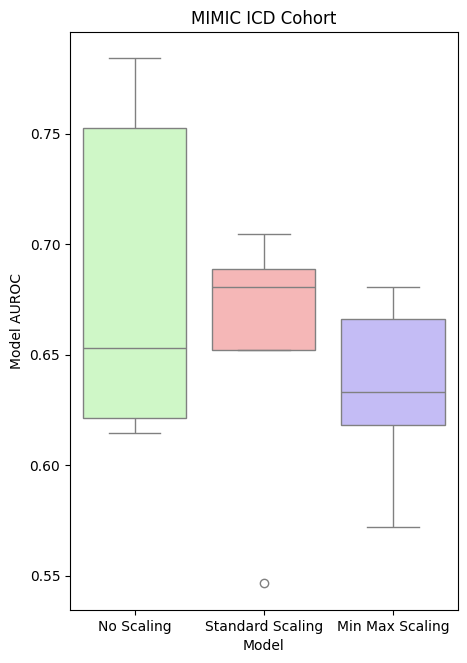

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5, 7.5))
ax = sns.boxplot(data=boxPlotDf, x='Scaling', y='AUROC Scores', hue='Scaling', palette=['#caffbf', '#ffadad', '#bdb2ff'])
ax.set(xticklabels=['No Scaling', 'Standard Scaling', 'Min Max Scaling'])
ax.set(xlabel='Model')
ax.set(ylabel='Model AUROC')
ax.set_title('MIMIC ICD Cohort')
plt.show()